In [3]:
# !pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 9.2 MB/s eta 0:00:00


In [6]:
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [8]:
dataset = load_breast_cancer()
cancer_df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
cancer_df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [9]:
cancer_df['target'] = dataset.target
cancer_df.head(2) # 뒤에 target 값 들어갔는지 확인

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


In [11]:
X = cancer_df.iloc[:,:-1] # 열은 맨 뒤에 하나만 빼고
y = cancer_df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=156)
X_tr,X_val,y_tr,y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=156)

In [12]:
lgbm = LGBMClassifier(n_estimators=400,learning_rate=0.05) 
# learning_rate를 너무 크게 잡으면 목적지를 벗어날 수 있고, 너무 작으면 목적지에 도달할 수 없을 수 있음
evals=[(X_tr,y_tr),(X_val,y_val)] # 검증용 데이터 evals
lgbm.fit(X_tr,y_tr,early_stopping_rounds=50,eval_metric='logloss',eval_set=evals,verbose=True) 
# X_tr,y_tr는 학습하기 위한 데이터
# early_stopping_rounds는 조기종료 횟수 적정한 지점이라고 판단했을 때 멈추기
# logloss 오차
pred = lgbm.predict(X_test)
pred_proba = lgbm.predict_proba(X_test)[:,1] # 예측값 1에 대한 확률만
# 오차값이라 점점 줄어듦
# 111에서 멈췄으니 111에서 50개 앞으로

[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334601	valid_1's binary_logloss: 0.421371
[14]	training's binary

C:\Users\user\anaconda3\envs\go\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\user\anaconda3\envs\go\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [18]:
def get_clf_eval(y_test,pred=None,pred_proba=None):  # pred 결정값 pred_proba 확률값
    from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score,roc_auc_score
    accuracy = accuracy_score(y_test,pred)
    confusion = confusion_matrix(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    # 추가
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차행렬')
    print(confusion)
    print(f'정확도: {accuracy:.4f} 정밀도: {precision:.4f} 재현율: {recall:.4f} f1: {f1:.4f} auc: {roc_auc:.4f}')

In [19]:
get_clf_eval(y_test,pred,pred_proba)

오차행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561 정밀도: 0.9615 재현율: 0.9740 f1: 0.9677 auc: 0.9877


In [20]:
from lightgbm import plot_importance

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

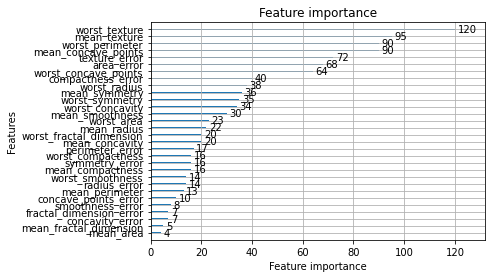

In [21]:
plot_importance(lgbm) # lgbm이라 학습된 것을 넣어줌